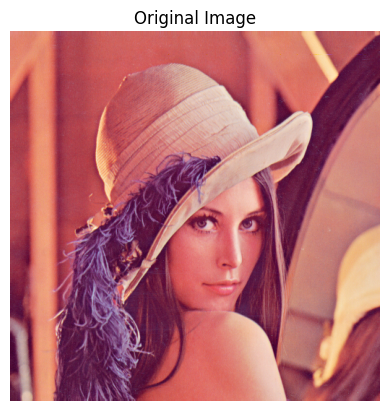

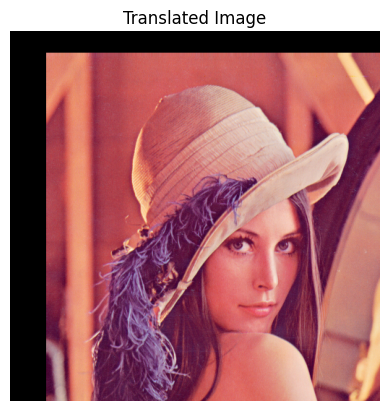

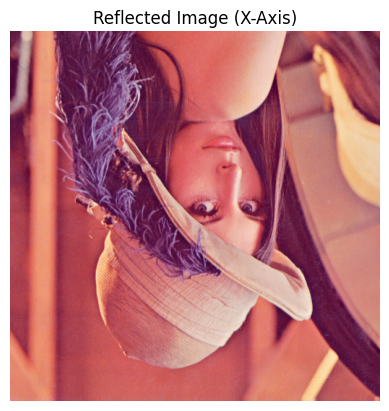

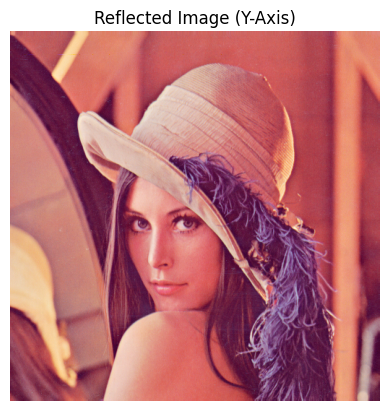

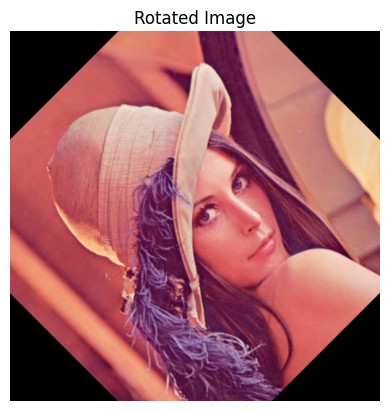

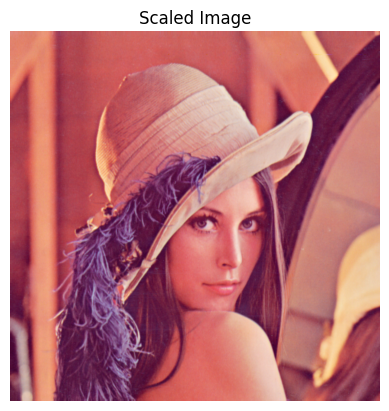

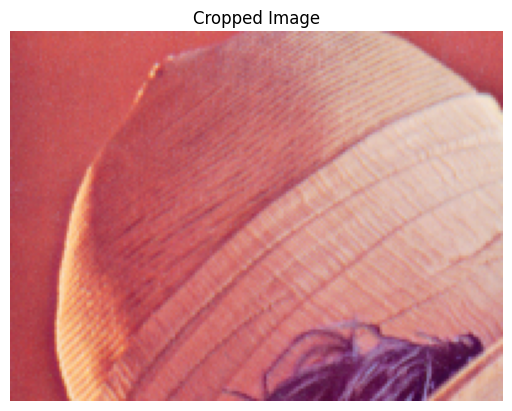

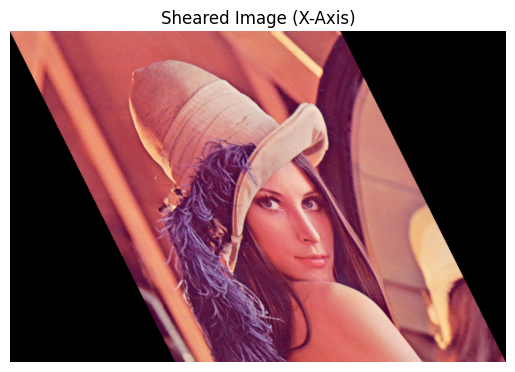

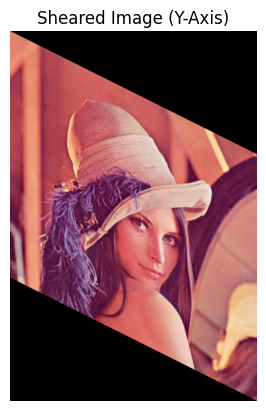

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title="Image"):
    """Display an image using Matplotlib."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


image = cv2.imread("Lena_Image.png")
display_image(image, "Original Image")
(h, w) = image.shape[:2]

tx, ty = 50, 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (w, h))
display_image(translated_image, "Translated Image")


reflected_image_x = cv2.flip(image, 0)
display_image(reflected_image_x, "Reflected Image (X-Axis)")

reflected_image_y = cv2.flip(image, 1)
display_image(reflected_image_y, "Reflected Image (Y-Axis)")


angle = 45
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
display_image(rotated_image, "Rotated Image")


scaling_factor_x, scaling_factor_y = 1.5, 1.5
scaled_image = cv2.resize(image, None, fx=scaling_factor_x, fy=scaling_factor_y, interpolation=cv2.INTER_LINEAR)
display_image(scaled_image, "Scaled Image")

cropped_image = image[50:200, 100:300]
display_image(cropped_image, "Cropped Image")

shear_x = 0.5
shearing_matrix_x = np.float32([[1, shear_x, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, shearing_matrix_x, (int(w + h * shear_x), h))
display_image(sheared_image_x, "Sheared Image (X-Axis)")


shear_y = 0.5
shearing_matrix_y = np.float32([[1, 0, 0], [shear_y, 1, 0]])
sheared_image_y = cv2.warpAffine(image, shearing_matrix_y, (w, int(h + w * shear_y)))
display_image(sheared_image_y, "Sheared Image (Y-Axis)")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_object(vertices, title, color='blue'):
    plt.plot(*zip(*(vertices.tolist() + [vertices[0]])), color=color)
    plt.title(title)
    plt.axis('equal')

rectangle = np.array([
    [1, 1],
    [4, 1],
    [4, 3],
    [1, 3]
])

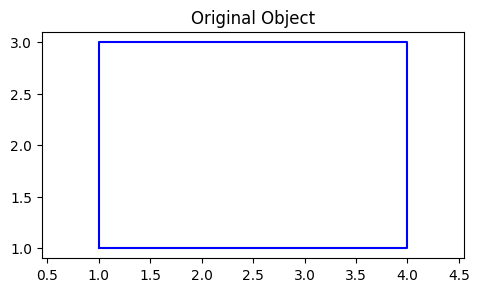

In [ ]:

rectangle_h = np.hstack((rectangle, np.ones((rectangle.shape[0], 1))))


plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plot_object(rectangle, "Original Object", color='blue')

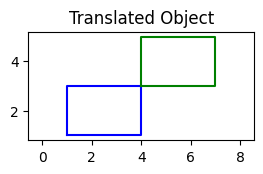

In [ ]:

# 2. Translation
Tx, Ty = 3, 2
translation_matrix = np.array([[1, 0, Tx], [0, 1, Ty], [0, 0, 1]])
translated = (translation_matrix @ rectangle_h.T).T[:, :2]

plt.subplot(3, 2, 2)
plot_object(rectangle, "Original Object (Translation)", color='blue')
plot_object(translated, "Translated Object", color='green')


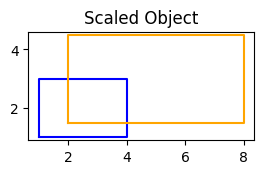

In [ ]:

# 3. Scaling
Sx, Sy = 2, 1.5
scaling_matrix = np.array([[Sx, 0, 0], [0, Sy, 0], [0, 0, 1]])
scaled = (scaling_matrix @ rectangle_h.T).T[:, :2]

plt.subplot(3, 2, 3)
plot_object(rectangle, "Original Object (Scaling)", color='blue')
plot_object(scaled, "Scaled Object", color='orange')

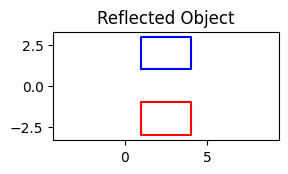

In [ ]:

reflection_matrix = np.array([[1, 0, 0],
                               [0, -1, 0],
                               [0, 0, 1]])
reflected = (reflection_matrix @ rectangle_h.T).T[:, :2]


plt.subplot(3, 2, 4)
plot_object(rectangle, "Original Object (Reflection)", color='blue')
plot_object(reflected, "Reflected Object", color='red')


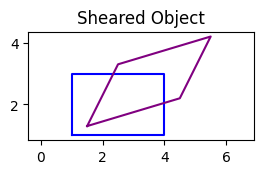

In [ ]:

# 5. Shearing
Shx, Shy = 0.5, 0.3
shearing_matrix = np.array([[1, Shx, 0],
                             [Shy, 1, 0],
                             [0, 0, 1]])
sheared = (shearing_matrix @ rectangle_h.T).T[:, :2]


plt.subplot(3, 2, 5)
plot_object(rectangle, "Original Object (Shearing)", color='blue')
plot_object(sheared, "Sheared Object", color='purple')

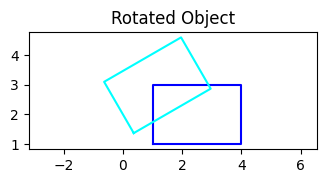

In [ ]:

# 6. Rotation (Optional, as previously shown)
theta = np.radians(30)
cos_theta, sin_theta = np.cos(theta), np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta, 0],
                            [sin_theta, cos_theta, 0],
                            [0, 0, 1]])
rotated = (rotation_matrix @ rectangle_h.T).T[:, :2]

plt.subplot(3, 2, 6)
plot_object(rectangle, "Original Object (Rotation)", color='blue')
plot_object(rotated, "Rotated Object", color='cyan')


plt.tight_layout()
plt.show()


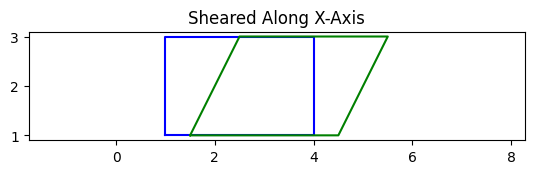

In [ ]:
shear_x = 0.5
shearing_matrix_x = np.array([
    [1, shear_x, 0],
    [0, 1, 0],
    [0, 0, 1]
])
sheared_x = (shearing_matrix_x @ rectangle_h.T).T[:, :2]

plt.subplot(3, 1, 2)
plot_object(rectangle, "Original Object (X-Shear)", color='blue')
plot_object(sheared_x, "Sheared Along X-Axis", color='green')

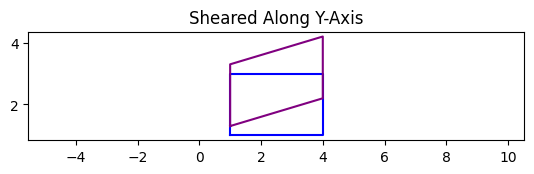

In [ ]:


shear_y = 0.3
shearing_matrix_y = np.array([
    [1, 0, 0],
    [shear_y, 1, 0],
    [0, 0, 1]
])
sheared_y = (shearing_matrix_y @ rectangle_h.T).T[:, :2]

plt.subplot(3, 1, 3)
plot_object(rectangle, "Original Object (Y-Shear)", color='blue')
plot_object(sheared_y, "Sheared Along Y-Axis", color='purple')